# Input signals: waves and voices

The input of the chain of signal flow blocks is the measured audio signal. This can be either a wave file or the ouput of a microphone driver.
The analogue digital (AD) conversion has three parameters:

Overload point: the maximum analogue magnitude which can be converted without distortion. If magnitudes above the overload point are measured, clipping occurs.

Sampling rate $r$: the sampling rate states how many samples are measured per second. In Audio processing, common used sampling rates are $r=44100$ Hz (Audio CD), $r=48000$ Hz (professional audio equipment), $r=16000$ Hz (wideband audio) or $r=8000$ Hz (narrowband audio).

Number of bits $w$: the quantisation uses a defined number of bits per audio sample. The product of sampling rate $r$ and number of bits $w$ gives the amound of data per audio channel.

## Power and variance

The power of a signal $x(n)$ of length $N$ is defined by:

$P=\frac{1}{N}\sum_{n=0}^{N-1} x^2(n)$

Note: for signals with zero mean, this is the same definition as for the variance $\sigma^2$.

$P=\sigma^2$

## RMS and standard deviation
The root mean square (RMS) of a signal is the root of the power:

$\text{RMS}=\sqrt{P}$

Note: this is the same definition as for the standard deviation $sigma$:

$\text{RMS} = \sigma$

These equations are checked by the known RMS of a sinus with magnitude $\hat x$:

$\text{RMS}=\frac{\hat x}{\sqrt{2}}$

$P=\frac{\hat{x}^2}{2}$

In [1]:
import numpy as np
import matplotlib.pyplot as plt

r = 48000
t = np.arange(r) / r # one second
f = 6950 * np.random.rand(1) + 50 # 50 Hz < f < 7000 Hz -> wideband speech
x_hat = 5 * np.random.rand(1)
phi = 2*np.pi*np.random.rand(1)
x = x_hat*np.sin(2*np.pi*f*t+phi)

P = np.mean(x**2)
assert np.abs(P - x_hat**2/2) < 1e-2, 'wrong evaluation of power'
#if not (np.abs(P - x_hat**2/3) < 1e-2): raise Exception('wrong evaluation of power')

## dB Sound pressure level

The human ear can analyse a wide range of sound pressure. Therefore, soundlevel is usually described as a logarithmic value, e.g. dB SPL (Sound pressure level):

$L=20\log_{10}\frac{p_\text{eff}}{20\mu\text{Pa}}$ dB SPL

with $p_\text{eff}$ corresponding to the RMS of the sound pressure.
$0$ dB SPL corresponds to a silent sleeping room, where nothing can be heard. $140$ dB SPL is a starting jet.

## dB Full Scale
dB FS is normalized to the maximum possible amplitude of a digital signal. Assuming the maximum possible magnitude is $A$ (usually, $A$ corresponds to the overload point). A sinus with the magnitude $A$ has a RMS of $\frac{A}{\sqrt{2}}$ and a power of $P=\frac{A^2}{2}$. This sinus is defined as $0$ dB FS. An arbitrary signal $x(n)$ with a power of

$P=\frac{1}{N}\sum_{n=0}^{N-1}x^2(n)$

has a level of

$L=10\log_{10}\frac{P}{\frac{A^2}{2}}\text{ dB FS}=10\log_{10}\frac{2\cdot P}{A^2}\text{ dB FS}$

In our system, the output of the microphone is normalized to a maximum possible magnitude of $A=1$.

## Calibration

Calibration can be done by the measurement of dB SPL and dB FS of the same signal. The calibration can be defined by a parameter $a$:

$L_\text{dB FS} = a + L_\text{dB SPL}$

E.g. my Smartphone has a calibration factor of $a\approx115$ (measured in January 2023).

## Signal to noise ratio
The signal to noise ratio (SNR) is a logarithmic measure of the distortion of a signal $x(n)$ due to noise:

$y(n) = x(n) + \text{noise}$

It is measured in Decibel (dB). Large values corresponds to a low level of noise. Small values corresponds to great level of noise.
The SNR is evaluated by the following equation:

$\text{SNR} = 10\cdot\log_{10}\frac{\sum_n x^2(n)}{\sum_n \left(x(n)-y(n)\right)^2}=10\cdot\log_{10}\frac{\frac{1}{N}\sum_{n=0}^{N-1} x^2(n)}{P_E}$ with

$P_E$ corresponding to the power of the noise.

The SNR can also be expressed by the difference between the level of the signal and the level of the noise.

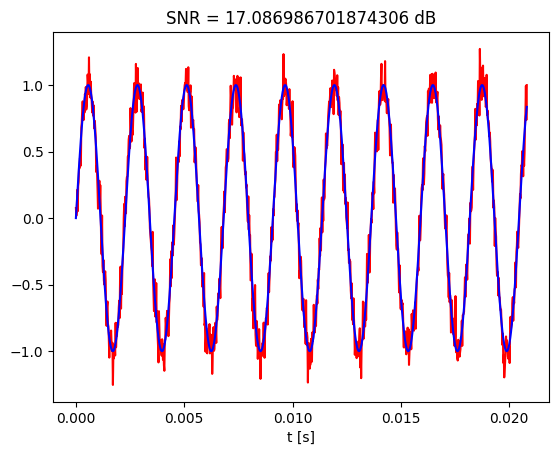

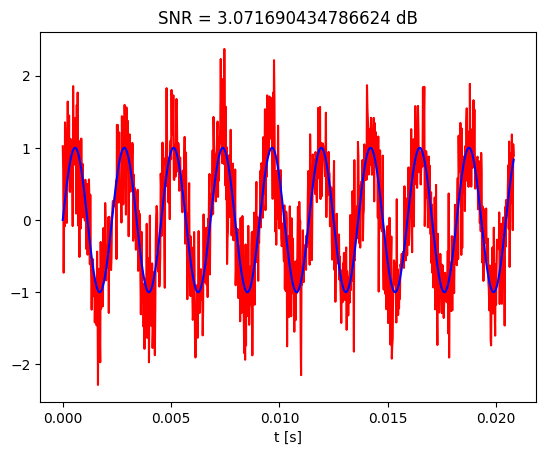

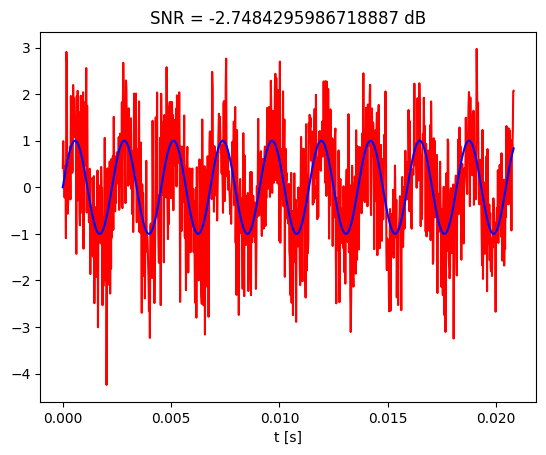

In [2]:
r = 48000
f = 440
t = np.arange(1000)/r
x = np.sin(2*np.pi*f*t)
y1 = x + np.random.randn(x.shape[0])*0.1
y2 = x + np.random.randn(x.shape[0])*0.5
y3 = x + np.random.randn(x.shape[0])*1.0

def SNR(x, y):
    return 10*np.log10(np.sum(x**2)/np.sum((x-y)**2))

def CreateSinglePlot(x, y):
    plt.plot(t, y, 'r')
    plt.plot(t, x, 'b')
    plt.xlabel('t [s]')
    ATitle = 'SNR = ' + str(SNR(x, y)) + ' dB'
    plt.title(ATitle)
    plt.show()

CreateSinglePlot(x, y1)
CreateSinglePlot(x, y2)
CreateSinglePlot(x, y3)

## Quantisation noise

Quantisation with $w$ bits results in a noise Power of

$P_E=\frac{\Delta^2}{12}$ (1)

with

$\Delta=\frac{2A}{2^w}$

## Programming exercise:

Fill in the missing code in the following procedures:

1) EvaluatePowerOfSignal

2) EvaluateSNROfQuantization

3) EvaluateSNR

4) EvaluatedBFullScale

5) EvaluatedBSoundPressureLevel

In [2]:
import unittest

def EvaluatePowerOfSignal(x):
    P_S = np.mean(x**2) # part of solution
    return P_S

def EvaluateSNROfQuantization(w):
    A = 1.0
    x = np.random.rand(10000) * 2 * A - A
    P_N = ((2*A) / (2**w))**2 / 12 # part of solution
    P_S = EvaluatePowerOfSignal(x) # part of solution
    SNR = 10*np.log10(P_S / P_N)
    return SNR

def EvaluateSNR(x, y):
    P_S = EvaluatePowerOfSignal(x) # part of solution
    P_N = EvaluatePowerOfSignal(x-y) # part of solution
    SNR = 10*np.log10(P_S / P_N) # part of solution
    return SNR

def EvaluatedBFullScale(A, x):
    L_dBFS = 10*np.log10(2*EvaluatePowerOfSignal(x) / (A**2)) # part of solution
    return L_dBFS

def EvaluatedBSoundPressureLevel(x_inPascal):
    L_SPL = 20*np.log10(np.sqrt(EvaluatePowerOfSignal(x_inPascal)) / (20e-6)) # part of solution
    return L_SPL

class TestProgrammingExercise(unittest.TestCase):

    def test_SNRMonotonicallyIncreasing(self):
        w1 = np.random.randint(20)
        w2 = w1 + 1
        self.assertGreater(EvaluateSNROfQuantization(w2), EvaluateSNROfQuantization(w1))
    
    def test_SNRSlope(self):
        for w in range(16):
            self.assertAlmostEqual(EvaluateSNROfQuantization(w), w*6, delta = 0.5)
            
    def test_EvaluatedBFullScale(self):
        A = np.random.rand(1)
        x = A*np.sin(2*np.pi*440*np.arange(10000)/16000)
        self.assertAlmostEqual(EvaluatedBFullScale(A, x), 0.0, delta = 0.5)
        self.assertAlmostEqual(EvaluatedBFullScale(A, x/np.sqrt(2)), -3.0, delta = 0.5)
        
    def test_EvaluatedBSoundPressureLevel(self):
        a = np.random.rand(1)
        x_inPascal = a*np.sin(2*np.pi*440*np.arange(10000)/16000)
        self.assertAlmostEqual(EvaluatedBSoundPressureLevel(x_inPascal), 20*np.log10(a) + 90.969, delta = 0.5)
        
    def test_EvaluatePowerOfSignalSinus(self):
        A = np.random.rand(1)
        x = A*np.sin(2*np.pi*440*np.arange(10000)/16000)
        self.assertAlmostEqual(EvaluatePowerOfSignal(x), A**2/2, delta = 0.01)

    def test_EvaluatePowerOfSignalUniformNoise(self):
        A = np.random.rand(1)
        x = 2*A*np.random.rand(10000)-A
        self.assertAlmostEqual(EvaluatePowerOfSignal(x), (2*A)**2/12, delta = 0.01)
        
    def test_EvaluatePowerOfSignalGaussianNoise(self):
        s = np.random.rand(1)
        x = s*np.random.randn(10000)
        self.assertAlmostEqual(EvaluatePowerOfSignal(x), s**2, delta = 0.1)
        
    def test_EvaluateSNRErrorEqualSignal(self):
        x = np.random.randn(10000)
        e = np.random.randn(10000)
        y = x + e
        self.assertAlmostEqual(EvaluateSNR(x, y), 0.0, delta = 0.5)
        
    def test_EvaluateSNRSmallError(self):
        factor = 1e-3
        x = np.random.randn(10000)
        e = np.random.randn(10000) * factor
        y = x + e
        self.assertAlmostEqual(EvaluateSNR(x, y), -20*np.log10(factor), delta = 3.0)

# https://stackoverflow.com/questions/40172281/unit-tests-for-functions-in-a-jupyter-notebook
unittest.main(argv=[''], verbosity=2, exit=False)

test_EvaluatePowerOfSignalGaussianNoise (__main__.TestProgrammingExercise.test_EvaluatePowerOfSignalGaussianNoise) ... ok
test_EvaluatePowerOfSignalSinus (__main__.TestProgrammingExercise.test_EvaluatePowerOfSignalSinus) ... ok
test_EvaluatePowerOfSignalUniformNoise (__main__.TestProgrammingExercise.test_EvaluatePowerOfSignalUniformNoise) ... ok
test_EvaluateSNRErrorEqualSignal (__main__.TestProgrammingExercise.test_EvaluateSNRErrorEqualSignal) ... ok
test_EvaluateSNRSmallError (__main__.TestProgrammingExercise.test_EvaluateSNRSmallError) ... ok
test_EvaluatedBFullScale (__main__.TestProgrammingExercise.test_EvaluatedBFullScale) ... ok
test_EvaluatedBSoundPressureLevel (__main__.TestProgrammingExercise.test_EvaluatedBSoundPressureLevel) ... ok
test_SNRMonotonicallyIncreasing (__main__.TestProgrammingExercise.test_SNRMonotonicallyIncreasing) ... ok
test_SNRSlope (__main__.TestProgrammingExercise.test_SNRSlope) ... ok

---------------------------------------------------------------------

## Exam preparation

1) A quantizer with $w=16$ bit is used. Give the amount of data for 70 minutes of recording on an audio cd. Hint: Audio cd are recorded in stereo mode.

2) Evaluate the level in dB SPL of a sinus with a magnitude of $0.1$ Pa. This sinus is digitalized to a digital signal $x(n)=0.25\cdot\sin\left(2\pi f\frac{n}{r}\right)$. The maximum possible magnitude of this AD converter is $A=1.0$. Evaluate the corresponding level dB FS and the calibration factor $a$.

3) Evaluate the SNR for a signal with $-12$ dB FS with quantization noise for $w=16$ bit. $A=1.0$ is still valid.

4) A signal $x(t)=a\cdot\cos\left(2\pi ft\right)$ is given, with $f=2$ kHz. $x(t)$ has a level of $75$ dB SPL. Evaluate the parameter $a$. Is it possible to evaluate the sign of $a$ by the given informations? Evaluate the level in dB SPL if the frequency is doubled.

5) What kind of function $y=f(x)$ results in a linear plot for a logarithmic x-axis, for a logarithmic y-axis and for a double-logarithmic plot?